# <span style="color:MidnightBlue">Part 4: Kaplan Meier Model</span>.

https://www.youtube.com/watch?v=VJPPeUpyC6c&list=PLqzoL9-eJTNDdnKvep_YHIwk2AMqHhuJ0&index=4

# <span style="color:MidnightBlue"> Part 5 | Kaplan Meier Model in R with RStudio</span>.

https://www.youtube.com/watch?v=6_AF9mMuk9E&list=PLqzoL9-eJTNDdnKvep_YHIwk2AMqHhuJ0&index=5

Note : This note book is created with R in Jupyter Notebook instead of R studio

In [1]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          4                           
minor          1.3                         
year           2022                        
month          03                          
day            10                          
svn rev        81868                       
language       R                           
version.string R version 4.1.3 (2022-03-10)
nickname       One Push-Up                 

### <span style="color:MidnightBlue"> 1. Data preperation</span>.

In [2]:
Time<- c(2,3,6,6,7,10,15,15,16,27,30,32)
Death<-c(1,0,1,1,1,0,1,1,1,1,1,1)
AIDSsurv<-data.frame(cbind(Time, Death))

AIDSsurv

Time,Death
<dbl>,<dbl>
2,1
3,0
6,1
6,1
7,1
10,0
15,1
15,1
16,1


Note: Time (Months), Death (1: event occured (death) , 0: no-event (censored)

In [3]:
attach(AIDSsurv)

The following objects are masked _by_ .GlobalEnv:

    Death, Time




### <span style="color:MidnightBlue"> 2. Call Library</span>.

In [5]:
library(survival)

_If you have not installed the package "survival", you need to install it first._

install.packages('survival')

### <span style="color:MidnightBlue"> 3.Fit the Kaplan Meier Model</span>.

__Fit the KM(survival) model for the data__

In [6]:
km.model <-survfit(Surv(Time, Death) ~ 1, type="kaplan-meier")

__Ask for some summaries of the model__

In [7]:
km.model

Call: survfit(formula = Surv(Time, Death) ~ 1, type = "kaplan-meier")

      n events median 0.95LCL 0.95UCL
[1,] 12     10     15       7      NA

In [8]:
summary(km.model)

Call: survfit(formula = Surv(Time, Death) ~ 1, type = "kaplan-meier")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    2     12       1    0.917  0.0798       0.7729        1.000
    6     10       2    0.733  0.1324       0.5148        1.000
    7      8       1    0.642  0.1441       0.4132        0.996
   15      6       2    0.428  0.1565       0.2089        0.876
   16      4       1    0.321  0.1495       0.1287        0.800
   27      3       1    0.214  0.1325       0.0635        0.720
   30      2       1    0.107  0.1005       0.0169        0.675
   32      1       1    0.000     NaN           NA           NA

You can find help for the funcion survfit by
__help(survfit)__

For example: At time 2, 
* n.risk: the number of subjects in the risk set at the starat of the interval
* n.event: the number of people died (or event occured)
* survival: the probability of survival,  $ S(t)=P(T>t) $, at time T=2, 
$S(2) = P(T>2) = 0.917$, 
* std.err: Assoiated standard error is 0.0798
* lower 95% CI, Upper 95% CI: 95% Confidence interval are described.


__Plot this model__

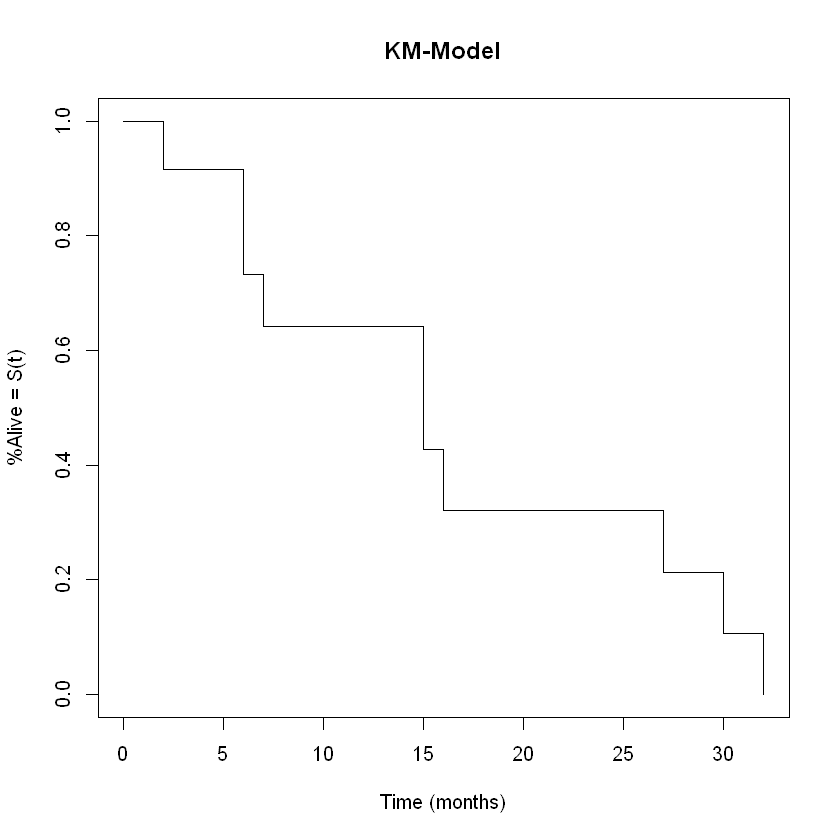

In [9]:
plot(km.model, conf.int=F, xlab="Time (months)", ylab="%Alive = S(t)", main="KM-Model")

With confidence interval around the survival funcion <Br>
las=1, rotate the y values to horizontal

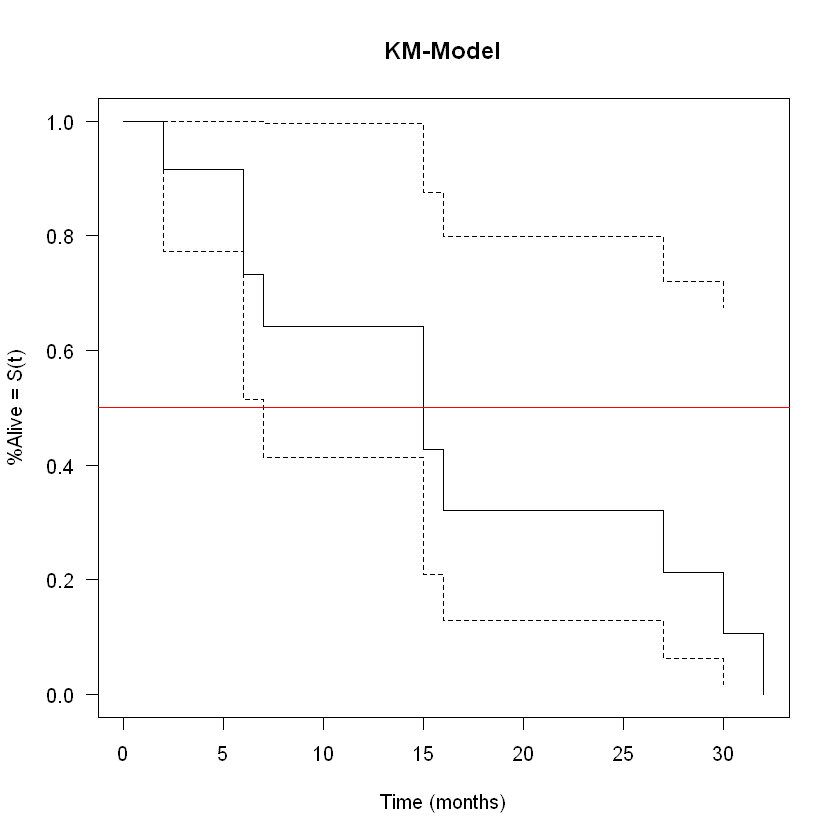

In [10]:
plot(km.model, conf.int=T, xlab="Time (months)", ylab="%Alive = S(t)", main="KM-Model", las=1)
abline(h=0.5, col="red") # median line, median survival time is 15 months

Also note that you can include a 'tick' where there is a censored observation by using the "mark-time" argument. <br>
You can see a little tick mark at time t=3 and time=10

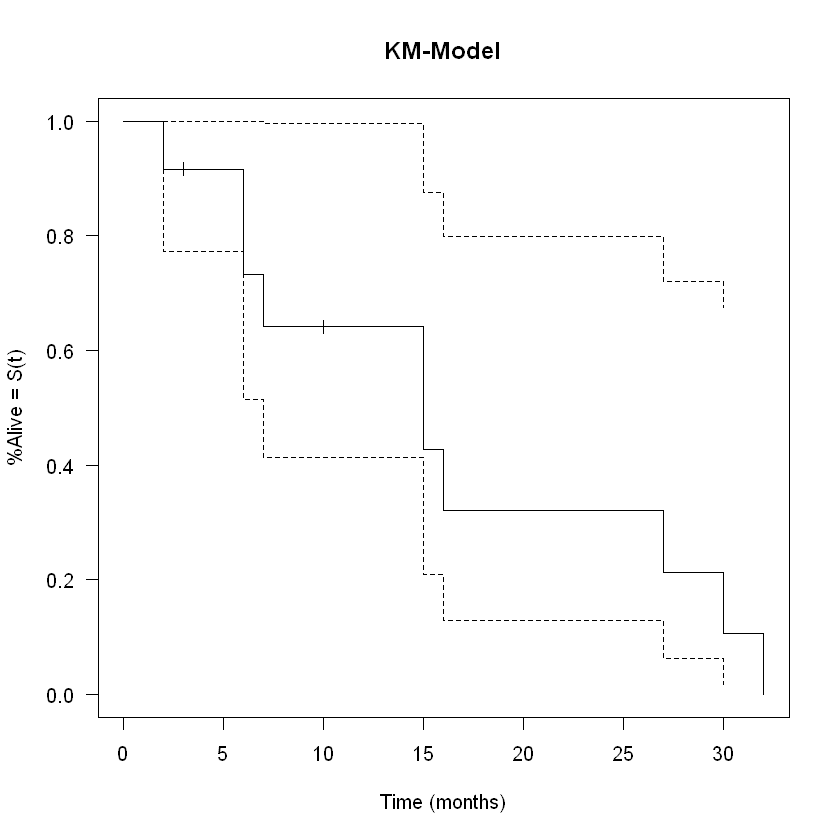

In [11]:
plot(km.model, conf.int=T, xlab="Time (months)", ylab="%Alive = S(t)", main="KM-Model", las=1, mark.time=TRUE)

### <span style="color:MidnightBlue"> 4.Fit the Kaplan Meier Model2</span>.

Now, lets look at the same data but with a group of age 40+ in there as well.

Detach and remove the previous data set.

detach(AIDSsurv)
rm(AIDSsurv)

__1. Prepare the second data__

In [12]:
Time<-c(2,3,6,6,7,10,15,15,16,27,30,32,1,1,1,1,2,3,3,9,22)
Death<-c(1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0)
Over40<-c(0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1)
daataa<-data.frame(cbind(Time,Death,Over40))

names(daataa)

[1] "Time"   "Death"  "Over40"

In [13]:
is.factor(Over40)
Over40 <- as.factor(Over40)
is.factor(Over40)

[1] FALSE

[1] TRUE

In [14]:
# detach(daataa)
attach(daataa)

The following objects are masked _by_ .GlobalEnv:

    Death, Over40, Time


The following objects are masked from AIDSsurv:

    Death, Time




In [15]:
View(daataa)

Time,Death,Over40
<dbl>,<dbl>,<dbl>
2,1,0
3,0,0
6,1,0
6,1,0
7,1,0
10,0,0
15,1,0
15,1,0
16,1,0


__2. Fit K-M model with adding Age variable__

In [16]:
km.model2 <-survfit( Surv(Time, Death) ~ Over40, type="kaplan-meier")

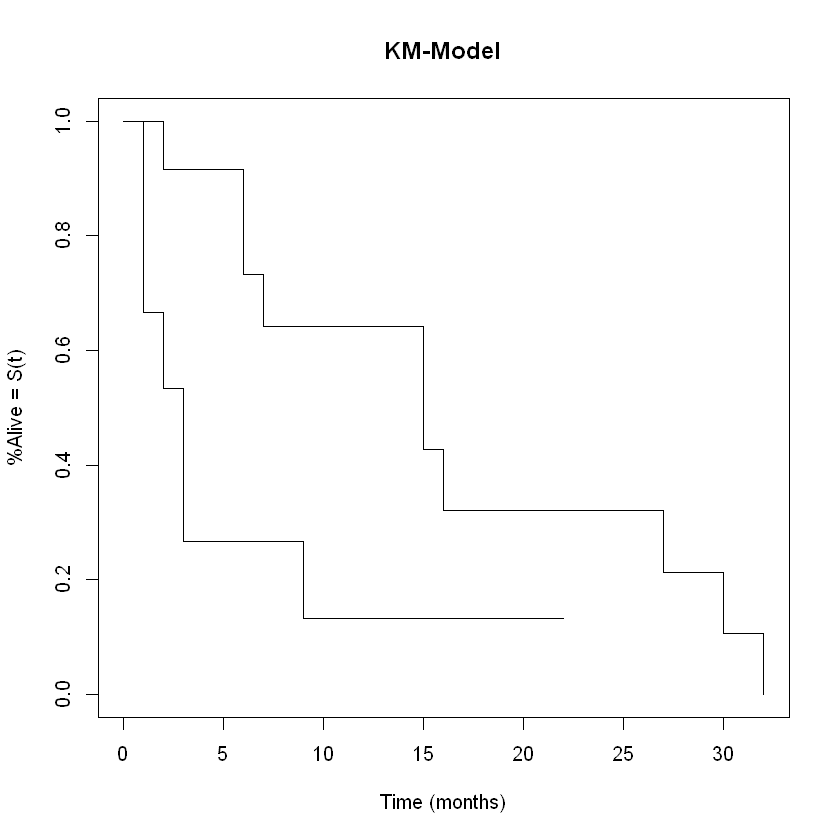

In [17]:
plot(km.model2, conf.int=F, xlab="Time (months)", ylab="%Alive = S(t)", main="KM-Model")

In [18]:
summary(km.model2)

Call: survfit(formula = Surv(Time, Death) ~ Over40, type = "kaplan-meier")

                Over40=0 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    2     12       1    0.917  0.0798       0.7729        1.000
    6     10       2    0.733  0.1324       0.5148        1.000
    7      8       1    0.642  0.1441       0.4132        0.996
   15      6       2    0.428  0.1565       0.2089        0.876
   16      4       1    0.321  0.1495       0.1287        0.800
   27      3       1    0.214  0.1325       0.0635        0.720
   30      2       1    0.107  0.1005       0.0169        0.675
   32      1       1    0.000     NaN           NA           NA

                Over40=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1      9       3    0.667   0.157       0.4200        1.000
    2      5       1    0.533   0.173       0.2821        1.000
    3      4       2    0.267   0.159       0.0829        0.858
    9      2       1    0.133   0.123  

In [19]:
km.model2

Call: survfit(formula = Surv(Time, Death) ~ Over40, type = "kaplan-meier")

          n events median 0.95LCL 0.95UCL
Over40=0 12     10     15       7      NA
Over40=1  9      7      3       1      NA

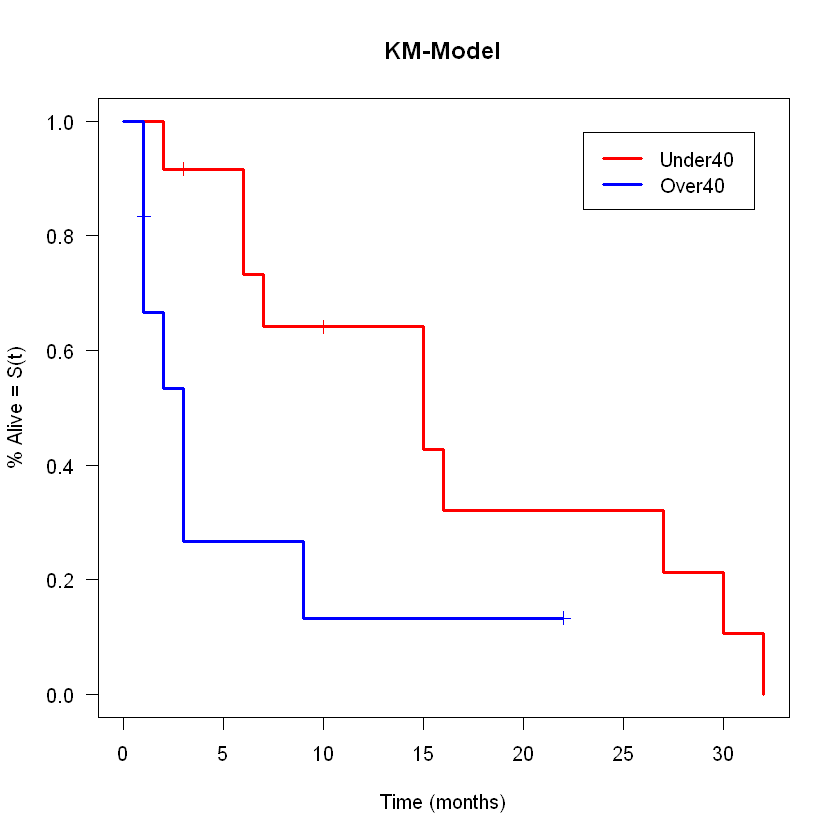

In [30]:
plot(km.model2, conf.int=F, xlab="Time (months)", ylab="% Alive = S(t)", main="KM-Model", 
     col=c("red", "blue"), las=1, lwd=3, mark.time=TRUE)

# add the legend: legend(x Coordinate  , y Coordinate )
# lty=1, solid line
# lwd=2, line width
# cex : size of legend box
legend(23, 0.98, legend=c("Under40", "Over40"), lty=1, lwd=3, 
      col=c("red", "blue"), bty="", cex=1)

__Do the LOG-RANK Test__ 
* H<sub>0</sub>: Survival in two groups is same
* H<sub>a</sub>: Survival in two group is not same



In [33]:
survdiff(Surv(Time, Death) ~ Over40)

Call:
survdiff(formula = Surv(Time, Death) ~ Over40)

          N Observed Expected (O-E)^2/E (O-E)^2/V
Over40=0 12       10    13.35     0.841      4.75
Over40=1  9        7     3.65     3.079      4.75

 Chisq= 4.8  on 1 degrees of freedom, p= 0.03 

Based on the small p-value = 0.03, at $\alpha$ level 0.05, we reject the Null hypothesis. Thus, Survival in two groups is not the same. 